## Anomaly Detection i.e Detecting the outliers in the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
n_samples = 1000
n_features = 2
n_clusters = 3
X, _ = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42)

In [4]:
n_outliers = 30
outliers = np.random.uniform(low=-10, high=10, size=(n_outliers, n_features))

In [5]:
# Combine normal data and outliers
X = np.vstack([X, outliers])

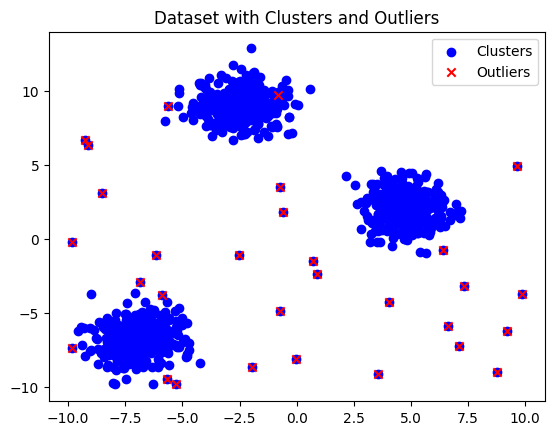

In [6]:
# Step 3: Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', label="Clusters")
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label="Outliers")
plt.legend()
plt.title("Dataset with Clusters and Outliers")
plt.show()

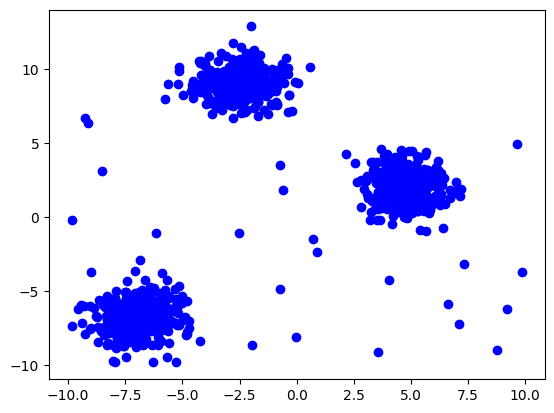

In [7]:
plt.scatter(X[:, 0], X[:, 1], c='blue', label="Clusters")

Let this *X* is the dataset with the anomalies

In [8]:
from sklearn.ensemble import IsolationForest

In [21]:
clf = IsolationForest(contamination=0.1)
clf.fit(X)
predictions = clf.predict(X)

In [22]:
predictions   # wherever we get 1a are normal datapoints and wherever we are getting -1 are outliers

array([ 1,  1,  1, ..., -1, -1, -1])

In [23]:
abn_ind = np.where(predictions < 0)
abn_ind

(array([  23,   40,   44,   45,   55,   65,   83,  103,  114,  154,  187,
         204,  212,  241,  245,  271,  285,  287,  294,  300,  329,  331,
         339,  343,  371,  372,  385,  387,  401,  417,  426,  460,  462,
         467,  476,  499,  544,  569,  573,  586,  588,  594,  596,  601,
         605,  606,  614,  623,  628,  646,  658,  669,  712,  772,  778,
         781,  785,  794,  805,  815,  827,  831,  854,  873,  883,  897,
         915,  921,  935,  956,  957,  967,  995,  997, 1000, 1001, 1002,
        1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1014,
        1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025,
        1026, 1027, 1028, 1029], dtype=int64),)

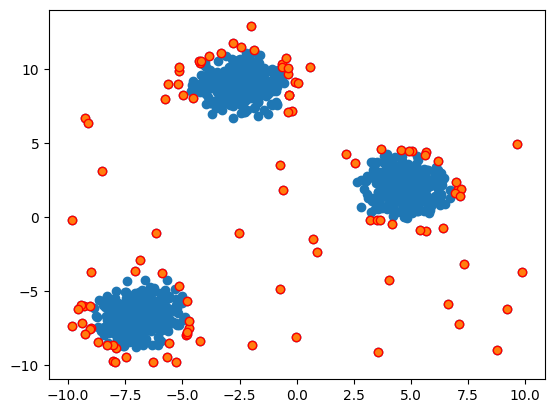

In [24]:
abn_ind = np.where(predictions < 0)
plt.scatter(X[:,0],X[:,1])
plt.scatter(X[abn_ind,0],X[abn_ind,1],edgecolors='r')

- No od outliers are classified based on the contamination that we are given